# Dataset 2 - Heart Disease 2020

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn import datasets, svm, tree, preprocessing, metrics
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split

## About the data
The data is gathered from the United Stated Center for Disease Control and Prevention (CDC), and contains heart disease data and parameter from 2020.

## 1. Downloading and understanding the data

In [2]:
#First, the data is read with pandas, and the head of the data is viewed. 
df = pd.read_csv('datasets/heart_2020_cleaned.csv')
print(df.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
#The head showed different type of values, let's look at all the different types.
#There are no null values but many different types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
#By descibing the data, we see that BMI has a higher value than the rest. and Standard deviation is low for SleepTime.
#This means that we might have to standardize the data later, so it fits better with a model.
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

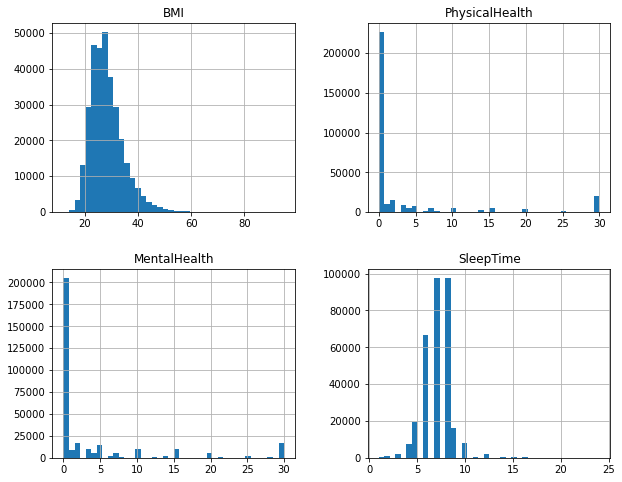

In [5]:
#Let's create a histogram, to get an idea of potentioal outliers, and knowlegde, by vizualising the data.
#The histogram show that there might be a few outliers on PhsycalHealth and MentalHealth, however the data might be imoprtant,
#since the context is health, and we want to look at people with high value for there parameters aswell.
df.hist(bins= 40, figsize=(10, 8))

<AxesSubplot:xlabel='BMI'>

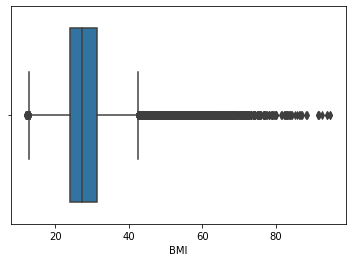

In [6]:
#Looking at BMI, we can se an outlier with very low BMI, let's remove that.
sns.boxplot(x = df['BMI'])

<AxesSubplot:xlabel='BMI'>

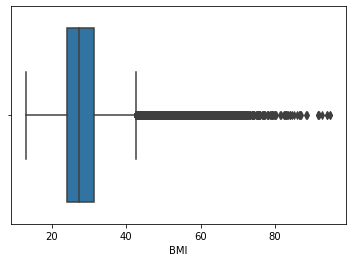

In [7]:
#SHOW COUNT OF < 13
df.drop(df.index[df['BMI'] < 13], inplace=True)
sns.boxplot(x = df['BMI'])

## 2. Data preparation

In [8]:
#Now we encode the object values from Object to Integer or float, so it fits with machine learning alhorithms.

#Function to encode 'Yes/No' to '1/0'.
def boolEncode(s):
    result = s.map(dict(Yes=1, No=0))
    return result

#Function to encode age from Category to mean of individual category range.
def ageEncode(s):
    result = []
    for i in s:
        if ("-" in str(i)):
            split = i.split("-")
            newAge = statistics.mean([int(split[0]), int(split[1])])
        else:
            newAge = 80
            
        result.append(newAge)   
    
    return result

#Function to preprocess a dataframe, and return a copy of encoded df.
def preprocessor(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    #LabelEncode categorical data.
    processed_df.Sex = le.fit_transform(df.Sex)
    processed_df.Race = le.fit_transform(df.Race)
    processed_df.GenHealth = le.fit_transform(df.GenHealth)
    #Encode 'Yes/No' to '1/0'
    processed_df.HeartDisease = boolEncode(df.HeartDisease)
    processed_df.Smoking = boolEncode(df.Smoking)
    processed_df.AlcoholDrinking = boolEncode(df.AlcoholDrinking)
    processed_df.Stroke = boolEncode(df.Stroke)
    processed_df.DiffWalking = boolEncode(df.DiffWalking)
    processed_df.Diabetic = boolEncode(df.Diabetic)
    processed_df.PhysicalActivity = boolEncode(df.PhysicalActivity)
    processed_df.Asthma = boolEncode(df.Asthma)
    processed_df.KidneyDisease = boolEncode(df.KidneyDisease)
    processed_df.SkinCancer = boolEncode(df.SkinCancer)
    #Encode the age to mean of category
    processed_df.AgeCategory = ageEncode(df.AgeCategory)
    processed_df.Diabetic = processed_df.Diabetic.fillna(0)
    return processed_df


p_df = preprocessor(df)

In [9]:
#Looking at the new types, we see that they are all of type int64 or float64, which means that it is ready for further evaluation.
p_df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int32
AgeCategory           int64
Race                  int32
Diabetic            float64
PhysicalActivity      int64
GenHealth             int32
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [10]:
p_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## 3. Vizualising the data to gain insights

In [11]:
#Let's look at the correlations for the Heart disease
#NOTE: Combination might have correlation, BAYES
corr_matrix = p_df.corr()
corr_matrix["HeartDisease"].sort_values(ascending=False)

HeartDisease        1.000000
AgeCategory         0.231610
DiffWalking         0.201226
Stroke              0.196742
Diabetic            0.183061
PhysicalHealth      0.170719
KidneyDisease       0.145099
Smoking             0.107762
SkinCancer          0.093282
Sex                 0.070041
BMI                 0.051917
Asthma              0.041420
Race                0.034900
MentalHealth        0.028556
SleepTime           0.008361
GenHealth          -0.011044
AlcoholDrinking    -0.032100
PhysicalActivity   -0.099997
Name: HeartDisease, dtype: float64

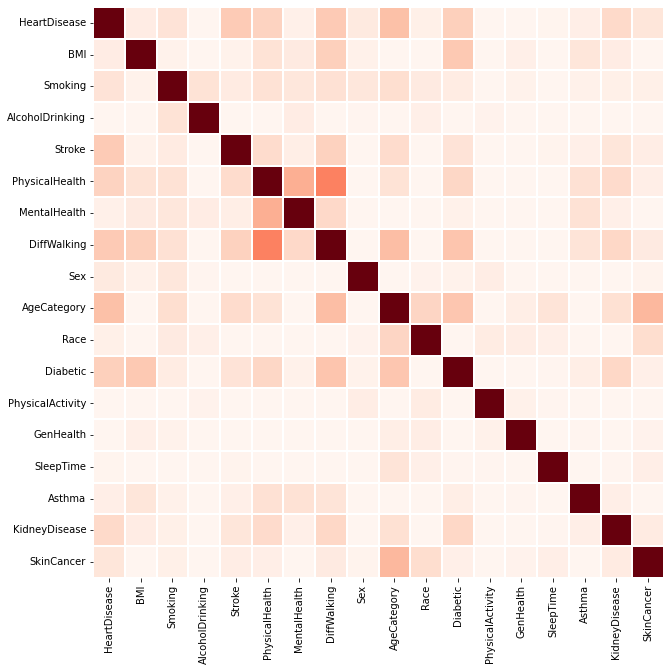

In [12]:
fig = sns.heatmap(corr_matrix, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Reds')
fig.figure.set_size_inches(18.5, 10.5)

Looking at the correlations and the heatmap, it is clear that some values does not seem to correlation with each other.

In [13]:
#Looking at the highest correlation, we can se that a higher age, means more likely to get heart disease.
#The reason we might have a semi-low correlation, can be because there are many young people in the dataset.
print('People younger than 50:', (p_df.AgeCategory < 50).sum())
print('Number of heart diseases:', (p_df[p_df.AgeCategory < 50][p_df.HeartDisease == 1]).HeartDisease.sum())
print('People older than 50:', (p_df.AgeCategory > 50).sum())
print('Number of heart diseases:', (p_df[p_df.AgeCategory > 50][p_df.HeartDisease == 1]).HeartDisease.sum())
print('This tells us that we a have many younger people, without heart disease, which is why there seems to be a low correlation')

People younger than 50: 120105
Number of heart diseases: 2014
People older than 50: 199644
Number of heart diseases: 25352
This tells us that we a have many younger people, without heart disease, which is why there seems to be a low correlation


C:\Users\sebas\AppData\Local\Temp/ipykernel_3012/1510576936.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of heart diseases:', (p_df[p_df.AgeCategory < 50][p_df.HeartDisease == 1]).HeartDisease.sum())
C:\Users\sebas\AppData\Local\Temp/ipykernel_3012/1510576936.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Number of heart diseases:', (p_df[p_df.AgeCategory > 50][p_df.HeartDisease == 1]).HeartDisease.sum())


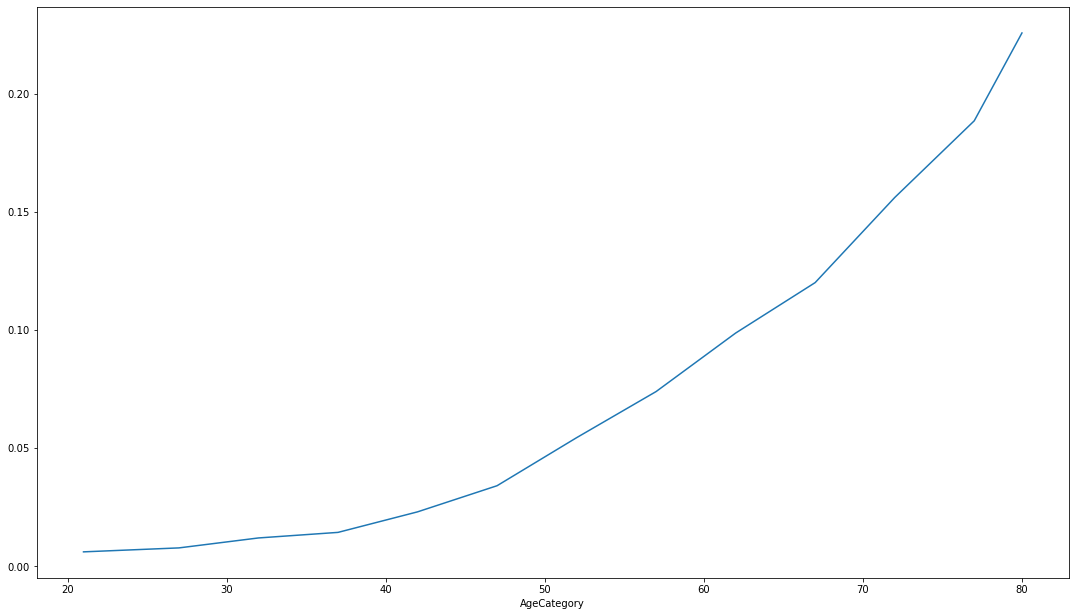

In [14]:
age_chart = p_df.groupby('AgeCategory')['HeartDisease'].mean().plot(kind='line')
fig = age_chart.get_figure()
fig.figure.set_size_inches(18.5, 10.5)
fig.savefig('static/ageChart.png')

This line graph is simple, but very descriptive. As expected, it shows that a person is more likely to have heartdisease, when they get older. With this data, we see an exponentional rise in the average of people having heart disease. A doctor could on this graph, give an indication to a patient, on the risk given their age.

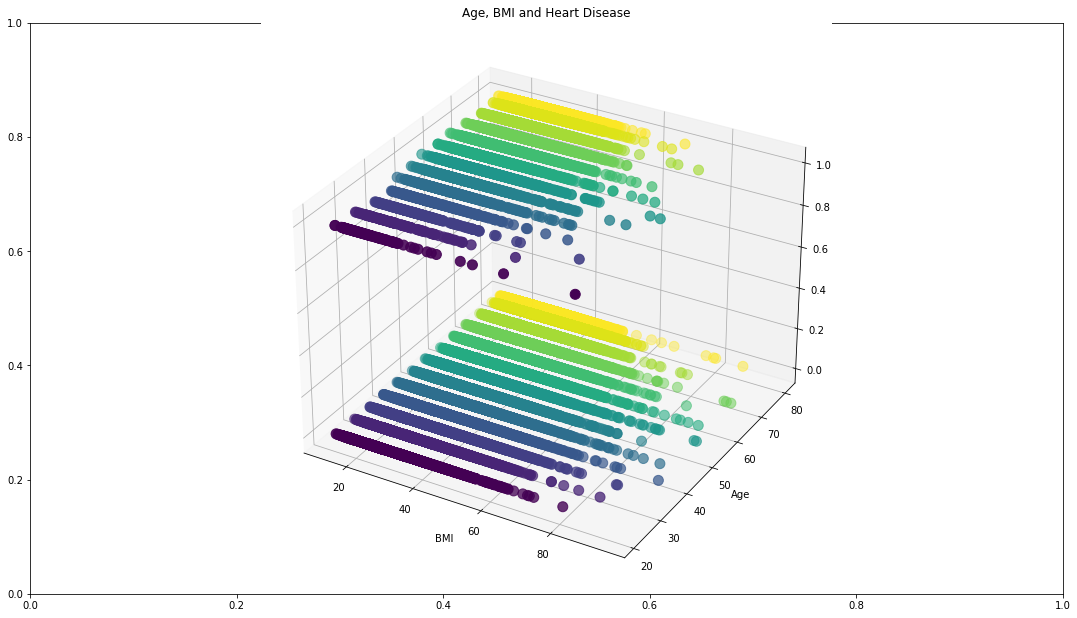

In [25]:
fig = plt.figure()
plt.title('Age, BMI and Heart Disease')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_df.BMI, p_df.AgeCategory, p_df.HeartDisease, marker='o', c=p_df.AgeCategory, s=100)
ax.figure.set_size_inches(18.5, 10.5)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.savefig('static/BMIAgeHeart.png')
plt.show()

This 3D graph showing how BMI and Age have an effect on heart diseases.
By looking at the graph in 3D, we can analyse the numbers better, by grouping the data in those who have heart disease, and those who does not. We can se the general density in BMI with Age, and how it might affect the result. In this graph, we can see that most people with a higher BMI at a young age, does not have heart disease, which is surprising. A doctor could use this, to compare a patients BMI and Age with the density of other data. For instance, if a patient is young, but has a higher BMI, they could consult them on a target BMI, to lower risk of heart disease.

**Pandas profiling file:**\
Looking at *Profilling/profiling_data2.html* We can get even more vizualiton of the data and its correlation.

In [15]:
#pandas_profiling.ProfileReport(p_df).to_file("profilling/profiling_data2.html")

## 4. Removing low correlation columns
After finding low correlated columns, the lowest are removed, insted of using PCA to begin with.

In [16]:
p_df.drop('AlcoholDrinking', inplace=True, axis=1)
p_df.drop('Sex', inplace=True, axis=1)
p_df.drop('Race', inplace=True, axis=1)
p_df.drop('PhysicalActivity', inplace=True, axis=1)
p_df.drop('GenHealth', inplace=True, axis=1)
p_df.drop('SleepTime', inplace=True, axis=1)
p_df.drop('Asthma', inplace=True, axis=1)
p_df.drop('KidneyDisease', inplace=True, axis=1)

In [17]:
p_df.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,SkinCancer
0,0,16.60,1,0,3.0,30.0,0,57,1.0,1
1,0,20.34,0,1,0.0,0.0,0,80,0.0,0
2,0,26.58,1,0,20.0,30.0,0,67,1.0,0
3,0,24.21,0,0,0.0,0.0,0,77,0.0,1
4,0,23.71,0,0,28.0,0.0,1,42,0.0,0


In [31]:
#Converting the data into two arrays (with and without target)
array = p_df.values
X = array[:, 1:]
y = array[:, :1]

In [18]:
#Standard scaling results in a worse score!
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

### 4.1 Using Principal Component Analysius (PCA) to reduce dimensions

In [19]:
# To run the model faster, we use dimensional reduction (PCA)
#NOTE: draw diagram.
from sklearn.decomposition import PCA

pca = PCA(0.98) #keep 98% accuracy
X_pca = pca.fit_transform(X)

pca.n_components_

4

In [20]:
#Looking at the explained Variance, we can see how accurate the model is,
#after using dimentional reduction.
pca.explained_variance_ratio_

array([0.65781233, 0.17099609, 0.08951406, 0.0805594 ])

## 5. Splitting the data into training and test set. 

In [66]:
#We need to have a training and a test set, so we can train a model, and test it.
#In this case, we splitting the data into 80% training, and 20% test.

#inital value for randomization(seed)
seed = 7
test_set_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_set_size, random_state=seed)

## 6. Select and train models

### 6.1 Starting with Bayes Classification

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
#ravel() will convert that array shape to (n, ) (i.e. flatten it)
model.fit(X_train, y_train.ravel())

GaussianNB()

In [23]:
score = model.score(X_test, y_test)
print(score)

0.8542767787333855


In [24]:
# Test on the test data, try prediction
prediction = model.predict(X_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

### 6.2 Cross validating several models

In [64]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [63]:
# We store each trained model into array called models[]
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

NameError: name 'LogisticRegression' is not defined

In [54]:
# Give a fixed value for seed to be used in all tests
seed = 7

# Give fixed value for the number of repeted trainings of one model
num_repeat = 10 #also called Folds

In [55]:
# Run all the algorithms and store their results in results[] and names in names[]
# For each we use the specific parameters preliminary stored in modelss[]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # prepare randomization of splits
    kfold = model_selection.KFold(n_splits=num_repeat, random_state=seed, shuffle=True)
    
    # implement the model and calcilate a score based on 'accuracy' (scoring)
    cv_results = model_selection.cross_val_score(model, X_test, y_test.ravel(), cv=kfold, scoring=scoring)
    
    # store the result of this method in array results[]
    results.append(cv_results)
    
    # store the name of this method in array names[]
    names.append(name)
    
    # tell what you have done so far
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)   
# repeat the same for next method

LR: 0.914120 (0.003329)
KNN: 0.906067 (0.003945)
CART: 0.868241 (0.003610)
NB: 0.854683 (0.003065)


### 6.3 Selecting the best scoring model
It seems that Logistical Regression gives the best score, which makes sense! We are trying to create a model to predict likelyhood of heart disease, or not heart disease.

In [67]:
l_model = LogisticRegression(max_iter=200)
l_model.fit(X_train, y_train.ravel())
l_model.score(X_test, y_test)

0.9143549648162627

In [56]:
#predict from data in the first entry. Should be 0.
l_model.predict([[16.60, 1, 0, 3.0, 30.0, 0, 57, 0, 1]])

array([0.])

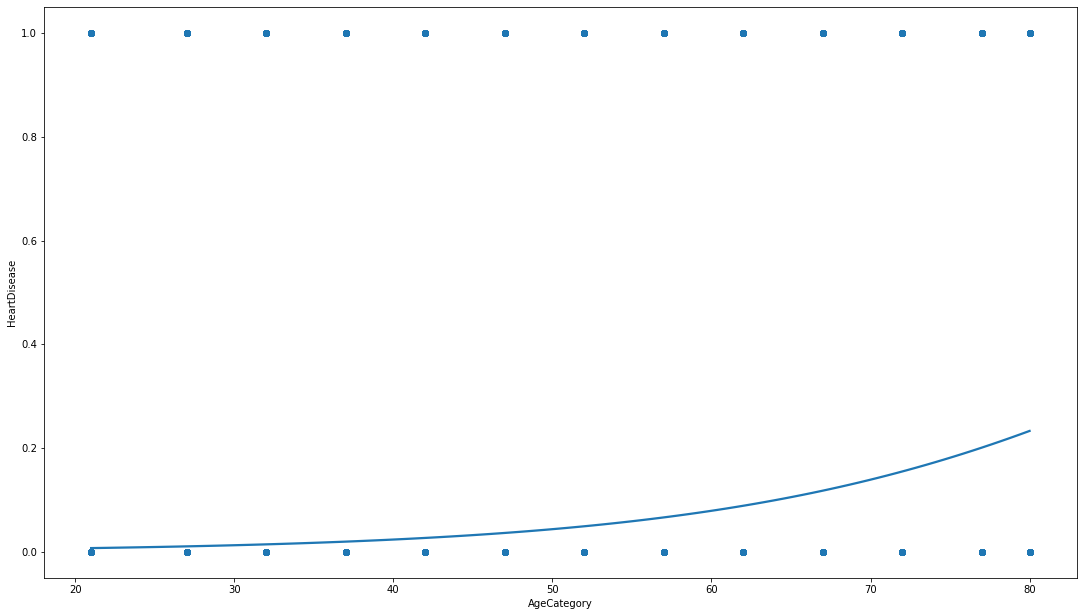

In [57]:
fig = sns.regplot(x=p_df.AgeCategory, y=p_df.HeartDisease, data=p_df, logistic=True, ci=None)
fig.figure.set_size_inches(18.5, 10.5)

This logistical plot, shows the probability of heart disease, given AgeCategory. Since the correlation is quite low (but highest of the dataset), it shows that probability of heart disease rises with age, but never to a 'certainty', with maximum age of 80.

In [39]:
y_pred = l_model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[58115   364]
 [ 5116   355]]


**Confusion matrix** show that there are 58115 **True Negatives** , 364 **False Positives**, 5116 **False Negatvies** and 355 **True Positives**

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     58479
         1.0       0.49      0.06      0.11      5471

    accuracy                           0.91     63950
   macro avg       0.71      0.53      0.53     63950
weighted avg       0.88      0.91      0.88     63950



**Classification report** show that precision is high, and f1_score (combination of precision and recall) is high, which is good!

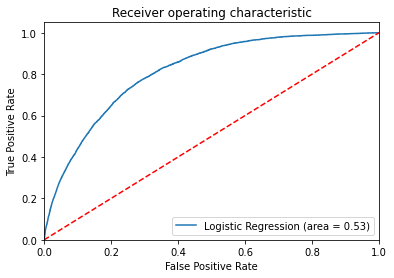

In [36]:
#This is used with binary classifiers
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, l_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, l_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**ROC Curve** Show that high specificity(X) are associated with high sensitivity(Y).\
*Note:* Look at the formula for these.

## 7. Storing the model

In [35]:
import joblib
joblib.dump(l_model, 'deploy/data2_model.pkl')

['deploy/data2_model.pkl']

In [1]:
#Notes for later:
#USE PRINCIPAL COMPONENT ANALYSIS
#BAYES CLASSIFICATION?
#Logistical Regression?
#Random Forest?
#E10-1 IRIS BAYES

#Vizualitation notes
# - If we could move the data, we might be able to 'move' a persons heart to healthy. (VR)

In [ ]:
#TODO: investigate correlation data
# Remove columns instead of PCA to begin with.
# trying Bayes